<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/CV9c_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error in this notebook

In [1]:
!git clone -l -s https://github.com/cagBRT/computer-vision.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 3918, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 3918 (delta 121), reused 106 (delta 59), pack-reused 3689
Receiving objects: 100% (3918/3918), 444.46 MiB | 21.31 MiB/s, done.
Resolving deltas: 100% (1456/1456), done.
Updating files: 100% (2299/2299), done.
/content/cloned-repo


In [2]:
!git clone https://github.com/rkuo2000/image-segmentation-keras
#%cd image-segmentation-keras

Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 1164, done.
remote: Total 1164 (delta 0), reused 0 (delta 0), pack-reused 1164
Receiving objects: 100% (1164/1164), 3.29 MiB | 1.34 MiB/s, done.
Resolving deltas: 100% (750/750), done.


In [3]:
#!pip install --upgrade keras
!pip install tensorflow==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 113.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 61.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing

In [4]:
!pip install keras-segmentation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 63.7 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29055 sha256=72aab843c19fb5bfc08bc3f43b04ac07f7a64964d69e082369af339e069c50df
  Stored in directory: /root/.cache/pip/wheels/2a/87/5b/ddc104c262fe1280e0565a2cc1b9b6b04963af12e462cdf068
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0


In [5]:
# import the necessary packages
import numpy as np
#import time
import cv2
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from six.moves import urllib
from matplotlib import gridspec
from PIL import Image
from tensorflow import keras
from keras.utils import np_utils

Semantic segmentation classifies every pixel of the image to one of the classes.

# **PSPNet: the model**<br>
PSPNet (Pyramid Scene Parsing Network)<br>
- **Semantic Segmentation** is to know the category label of each pixels for known objects only.
- **Scene Parsing**, which is based on Semantic Segmentation, is to know the category label of ALL pixels within the image.<br>


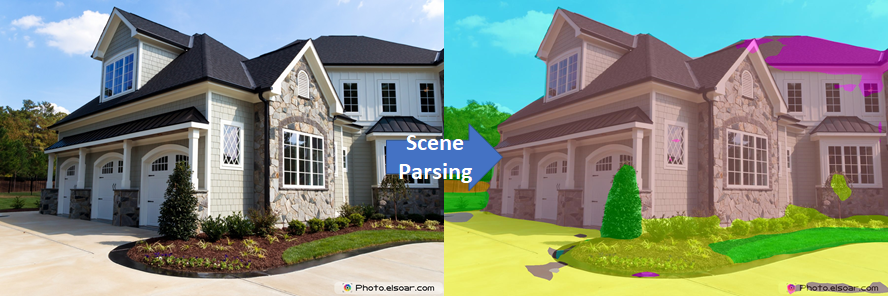

In [6]:
imageP = cv2.imread("/content/cloned-repo/images/sceneParsing.png")
cv2_imshow(imageP)

PSPNet uses global information to parse a scene<br>
- **Mismatched Relationship**: FCN predicts the boat in the yellow box as a “car” based on its appearance. But the common knowledge is that a car is seldom over a river.
- **Confusion Categories**: FCN predicts the object in the box as part of skyscraper and part of building. These results should be excluded so that the whole object is either skyscraper or building, but not both.
-**Inconspicuous Classes**: The pillow has similar appearance with the sheet. Overlooking the global scene category may fail to parse the pillow.

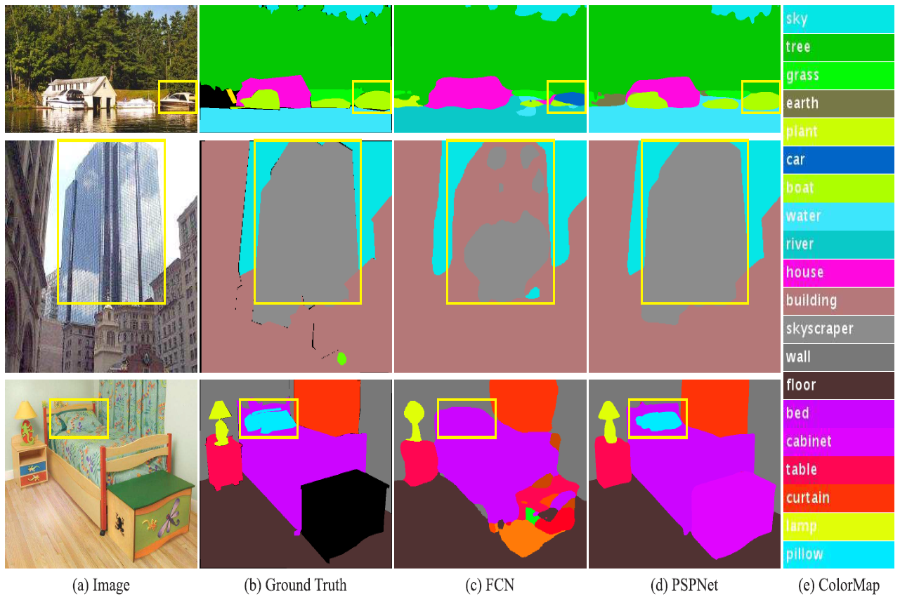

In [7]:
imageP = cv2.imread("/content/cloned-repo/images/contextAgg.png")
imageP = cv2.resize(imageP, (900,600))
cv2_imshow(imageP)

**PSPNet in video segmentation**

In [8]:
from IPython.display import Image
Image(url="https://miro.medium.com/max/1200/1*J33mxWAtCSEV1GsWV3vKLQ.gif")


**PSPNet Architecture**

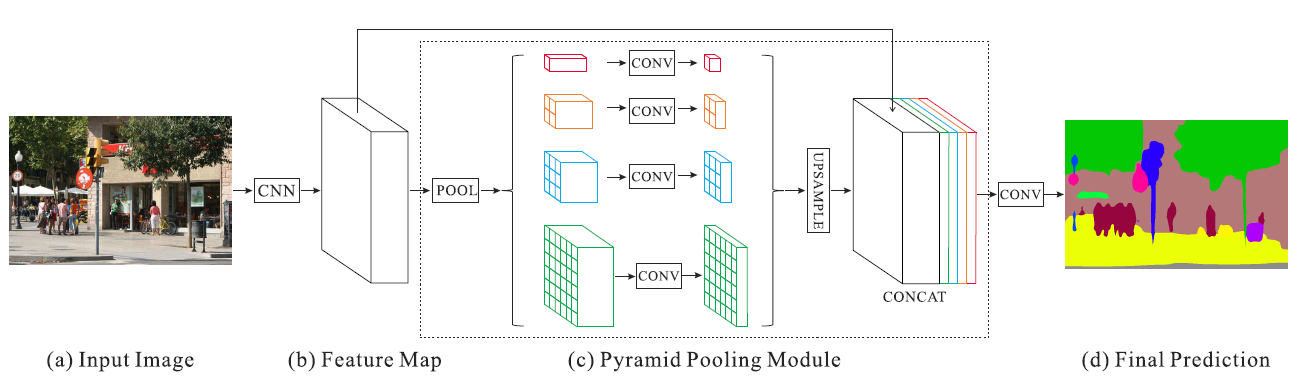

In [9]:
imageP = cv2.imread("/content/cloned-repo/images/pspNet.png")
cv2_imshow(imageP)

**A example image**
This image was taken from a video, it is one of a series of images from the video.

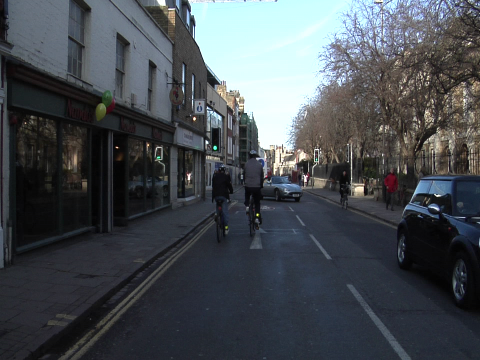

In [10]:
image = cv2.imread("/content/cloned-repo/datasetSeg/images_prepped_test/0016E5_07971.png")
cv2_imshow(image)

# **Install the required libraries**

In [11]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1build2).
libxext6 is already the newest version (2:1.3.4-1build1).
libxrender-dev is already the newest version (1:0.9.10-1build4).
libxrender-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [12]:
!pip install keras-segmentation

In [13]:
import cv2
from google.colab.patches import cv2_imshow

# **The datasets**<br>
Three different datasets are used to train the same model. <br>
This means each of the models - although the same model - will return a different segmentation image. <br>

- **pspnet_50_ADE_20K**:  the 20,000-image ADE20K challenge dataset. This ADE20K dataset is a landmark image segmentation dataset, containing a large corpus of both indoor and outdoor images. Every image has an accompanying image segmentation mask dividing the image into 150 different classes pixel-by-pixel.<br>
The dataset can be found here: https://groups.csail.mit.edu/vision/datasets/ADE20K/<br>
The labels can be found here: https://github.com/CSAILVision/sceneparsing/tree/master/visualizationCode/color150<br>
<br>
- **psp_101_cityscapres**: this dataset focuses on semantic understanding of urban street scenes. It has 30 classes and 20,000 images <br>
The dataset can be found here: https://www.cityscapes-dataset.com/dataset-overview/<br>
<br>
- **pspnet_101_voc12**: the main goal of the datset is the detection and identification of individual objects from a number of visual object classes in a realistic scene. The data set has 21 classes<br>
The class list can be found here: https://github.com/NVIDIA/DIGITS/blob/master/examples/semantic-segmentation/pascal-voc-classes.txt<br>
The dataset can be found here: https://deepai.org/dataset/pascal-voc


# **Loading the pretrained models**
Three pretrained models PSPNet models are loaded. Each model is trained on a different dataset. <br> The same image is used for each model and a comparison of the outputs is compared.

In [19]:
!pip install --upgrade git+https://github.com/divamgupta/image-segmentation-keras
from keras_segmentation.pretrained import pspnet_50_ADE_20K,pspnet_101_cityscapes, pspnet_101_voc12


model1 = pspnet_50_ADE_20K() # load the pretrained model trained on ADE20k dataset
model2 = pspnet_101_cityscapes() # load the pretrained model trained on Cityscapes dataset
model3 = pspnet_101_voc12() # load the pretrained model trained on Pascal VOC 2012 dataset


out = model1.predict_segmentation(
    inp=image,
    out_fname="out1.png"
)
out2 = model2.predict_segmentation(
    inp=image,
    out_fname="out2.png"
)
out3 = model3.predict_segmentation(
    inp=image,
    out_fname="out3.png"
)

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-1oefk56b
  Running command git clone --filter=blob:none --quiet https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-1oefk56b
  Resolved https://github.com/divamgupta/image-segmentation-keras to commit 1b2ba53ae49387c2d1abbd9a2f4a9a45eea6912f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 36.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
  Running setup.py clean for h5py
Failed to build h5py
ERROR: Could not build wheels for h5py, which is required to install pypr

AttributeError: ignored

**A helper function for plotting the images**

In [ ]:
def plotting(image, outSeg):
  plt.figure(figsize=(15, 8))
  grid_spec = gridspec.GridSpec(1, 3, width_ratios=[6, 6, 6])

  plt.subplot(grid_spec[0])
  plt.imshow(image)
  plt.axis('off')
  plt.title('input image')

  plt.subplot(grid_spec[1])
  plt.imshow(outSeg)
  plt.axis('off')
  plt.title('segmentation map')

  plt.subplot(grid_spec[2])
  plt.imshow(image)
  plt.imshow(outSeg, alpha=0.7)
  plt.axis('off')
  plt.title('segmentation overlay')

In [ ]:
imageO1 = cv2.imread("out1.png")
imageO2 = cv2.imread("out2.png")
imageO3 = cv2.imread("out3.png")

**The model trained on the ADE20k dataset**

In [ ]:
plotting(image, imageO1)

**The model trained on the Cityscapes dataset**

In [ ]:
plotting(image, imageO2)

**The model trained on the Pascal VOC 2012 dataset**

In [ ]:
plotting(image, imageO3)